# Step 1: Setup and Create Folders

In [ ]:
#@title Install Dependencies
!pip install zeroshot numpy

In [30]:
#@title Imports and Folder Setup
import glob
import os
import base64

import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
import numpy as np
from IPython.core.display import HTML
from sklearn.metrics import classification_report

In [ ]:
#@title Create the Classifier Object
import zeroshot

model = zeroshot.Classifier(
    "0972b494-165a-42de-905e-58deebe03607"
)
model.classes

In [ ]:
#@title Create Folders to Upload Into
for c in model.classes:
  if not os.path.exists(c):
    os.makedirs(c)

# Step 2: Upload Your Images
Upload your images into the folders for each class.

# Step 3: Evaluate

In [26]:
#@title Generate predictions for each item.
filenames = []
entry = []
for class_label in model.classes:
  folder = f"{class_label}/*"
  files = glob.glob(folder)
  for f in files:
    result = model.predict(f)
    class_name = model.classes[result]

    correct = (class_name == class_label)
    filenames.append(f)
    entry.append((class_label, class_name, correct, f))


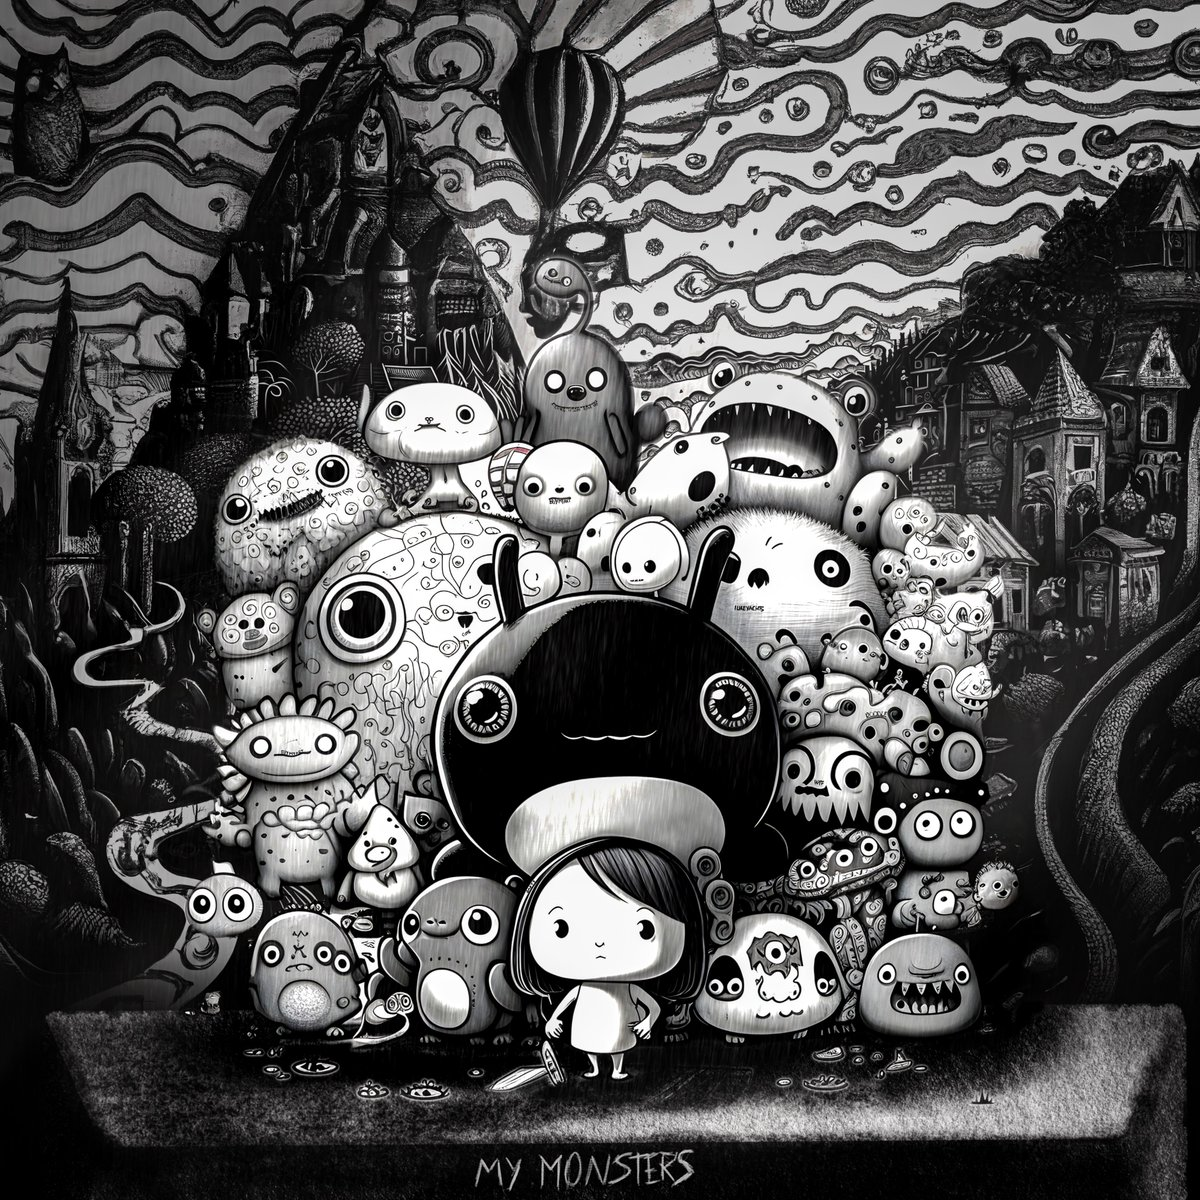
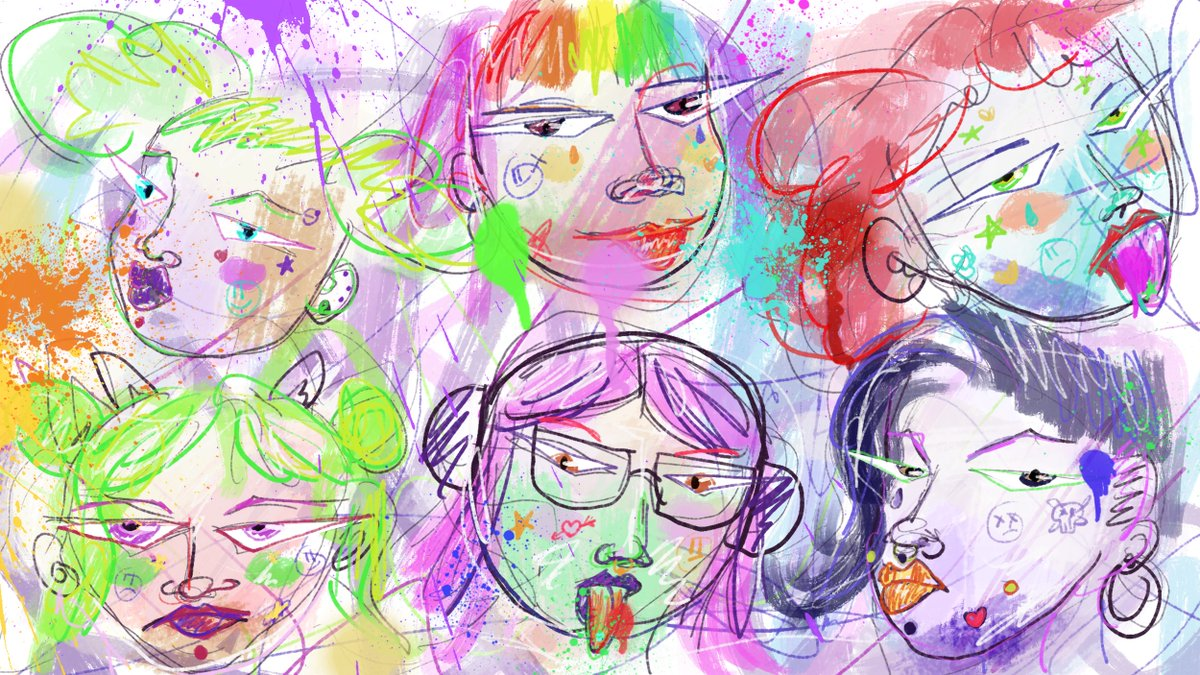
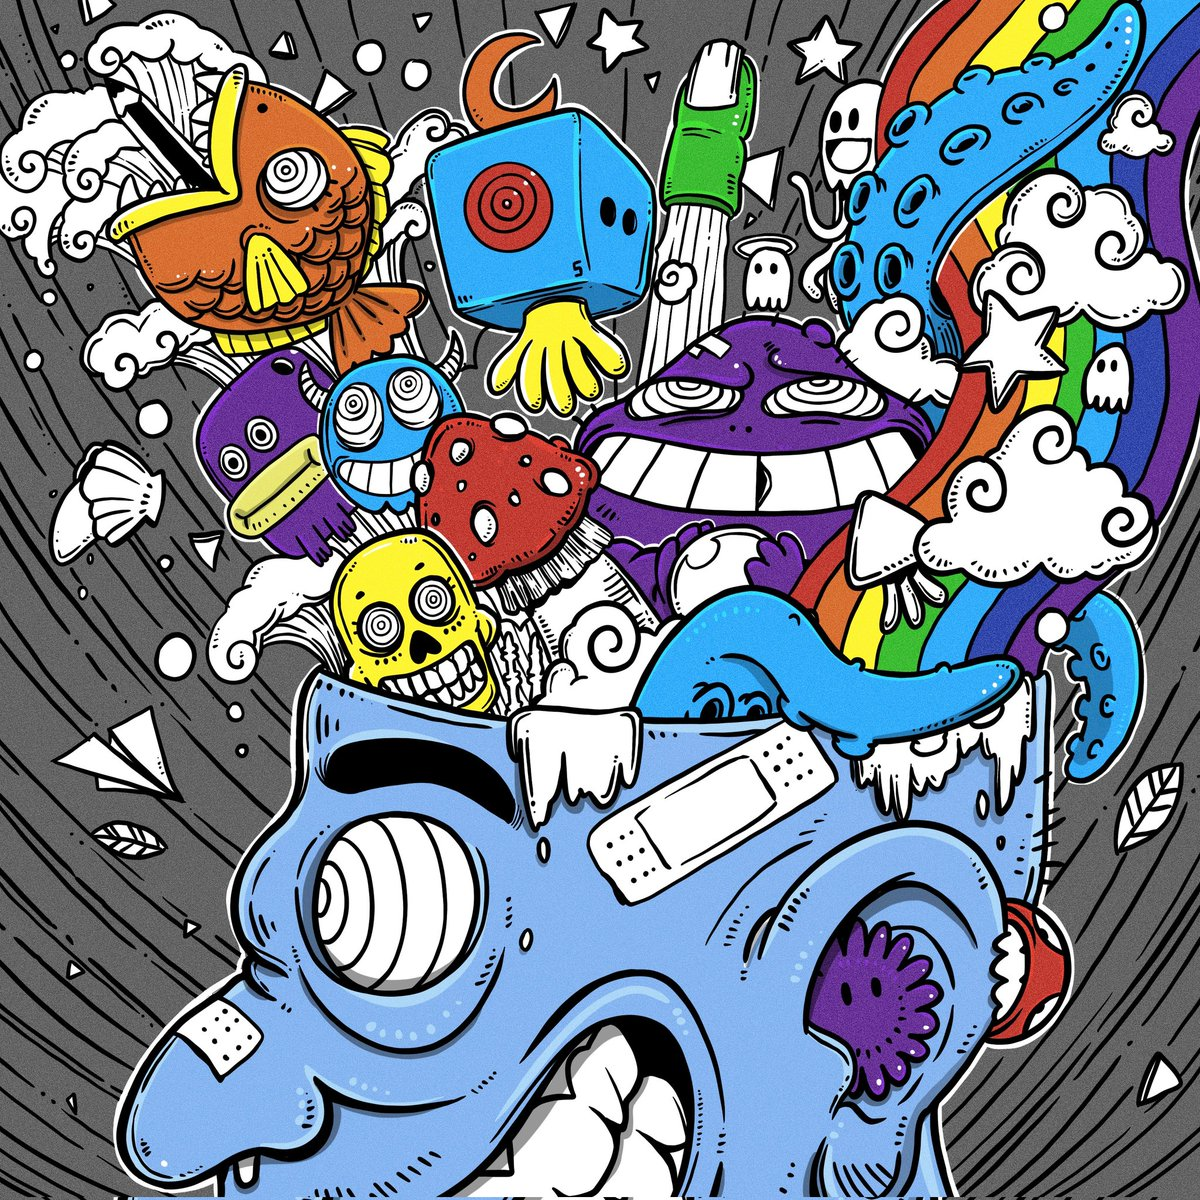
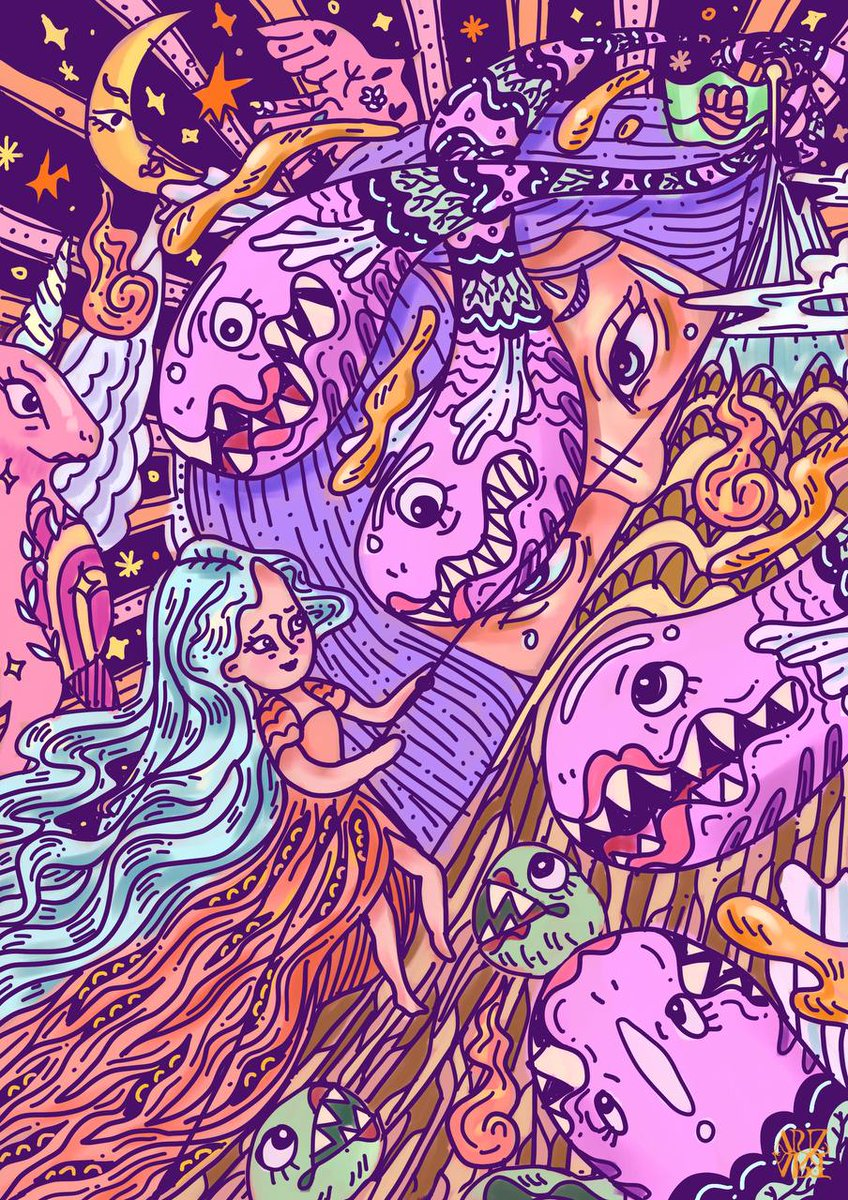
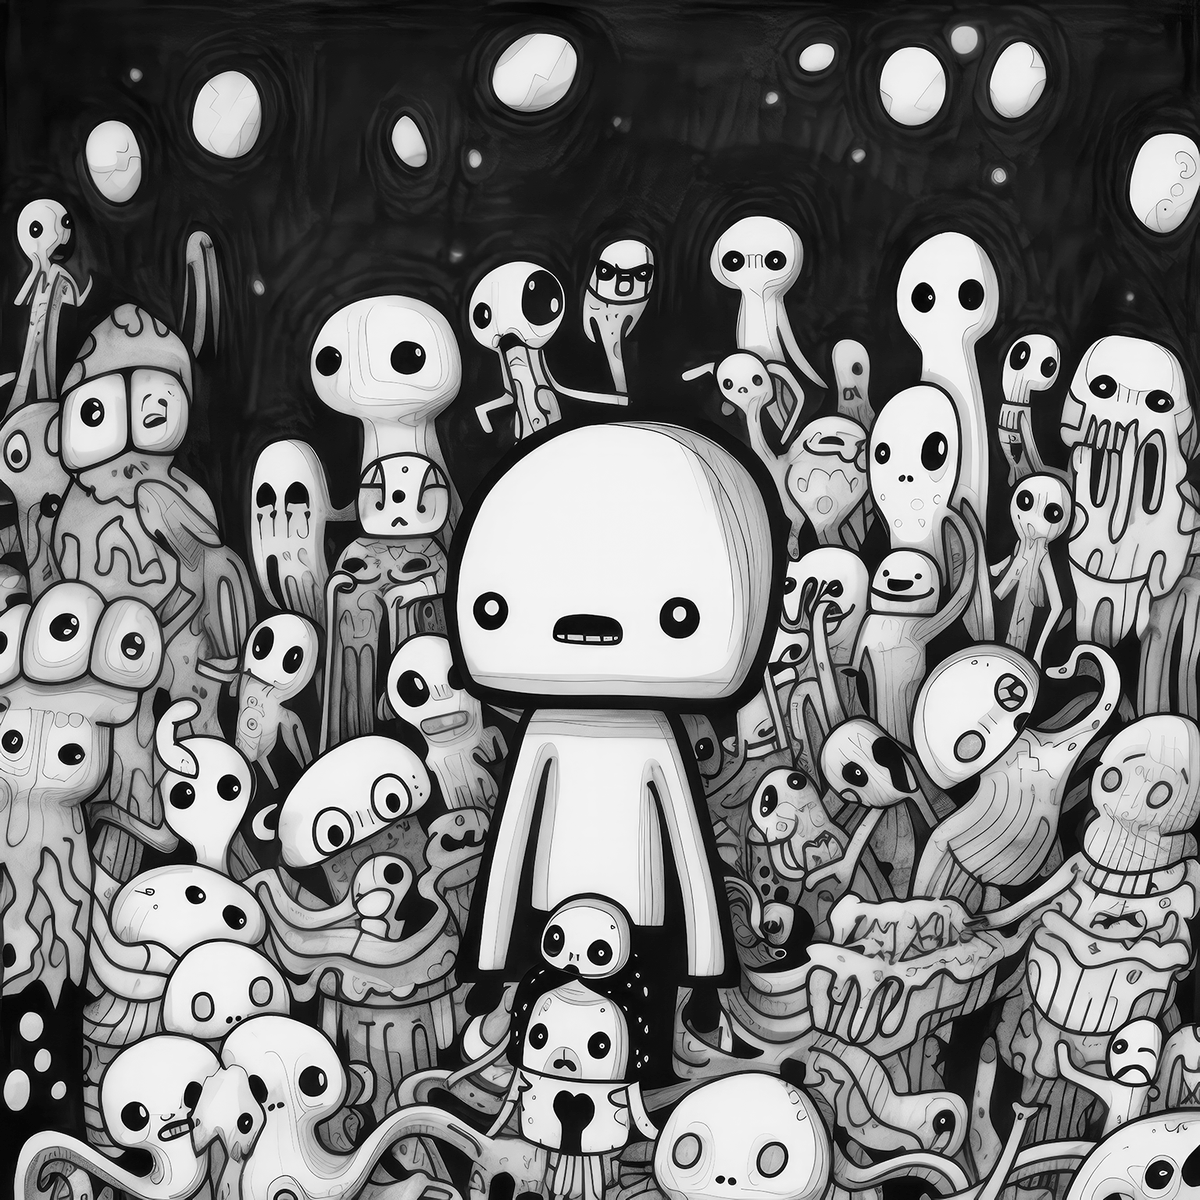
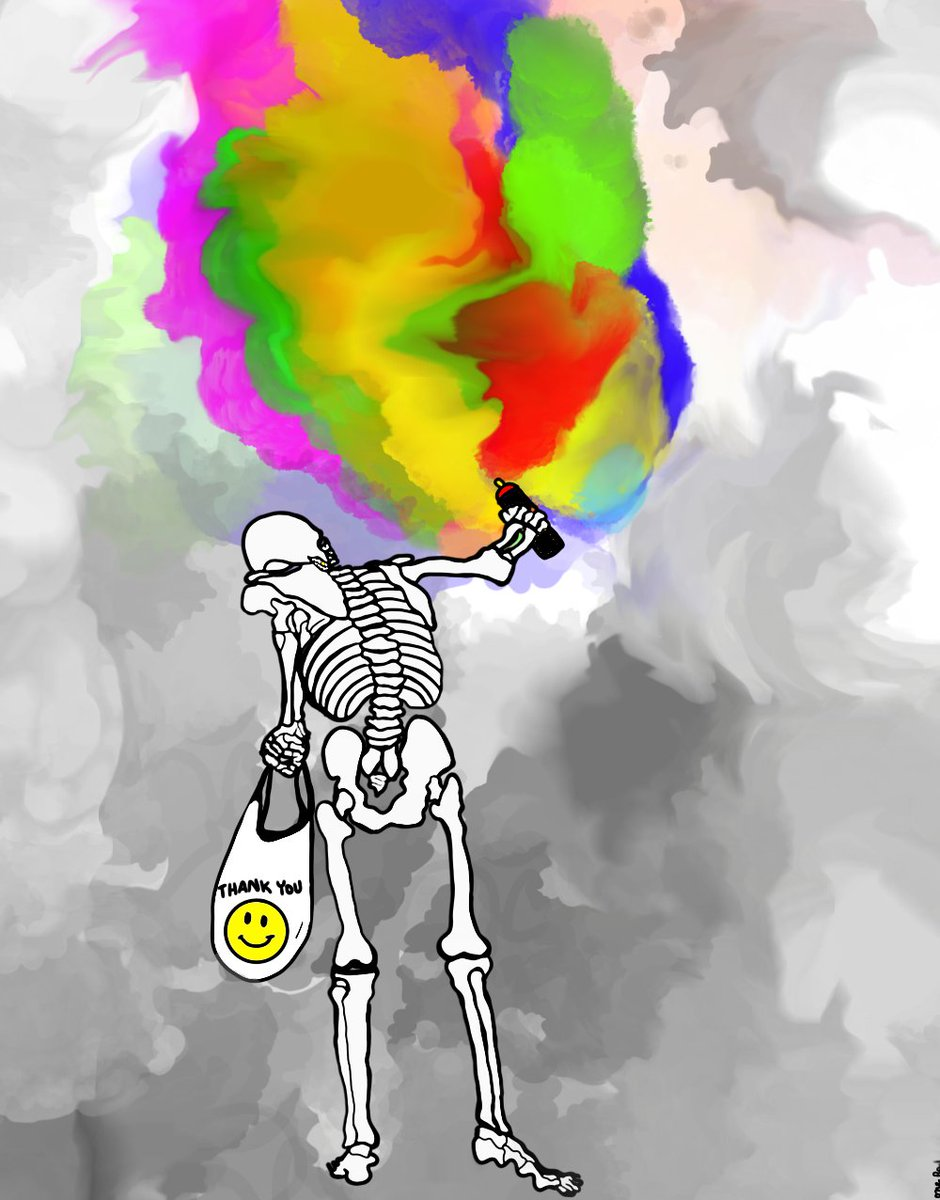
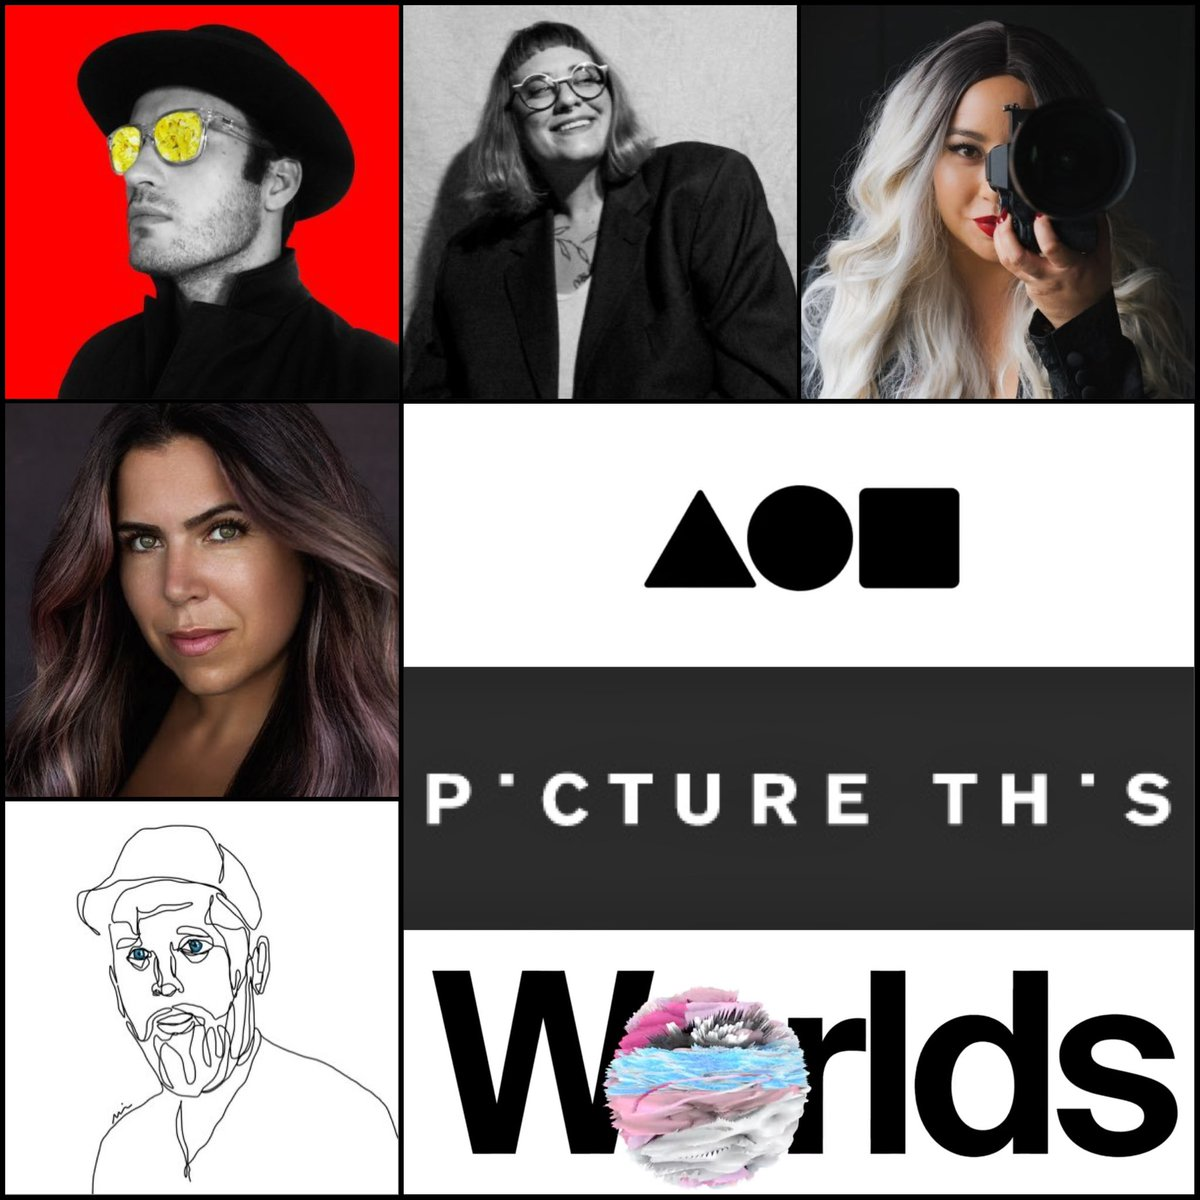
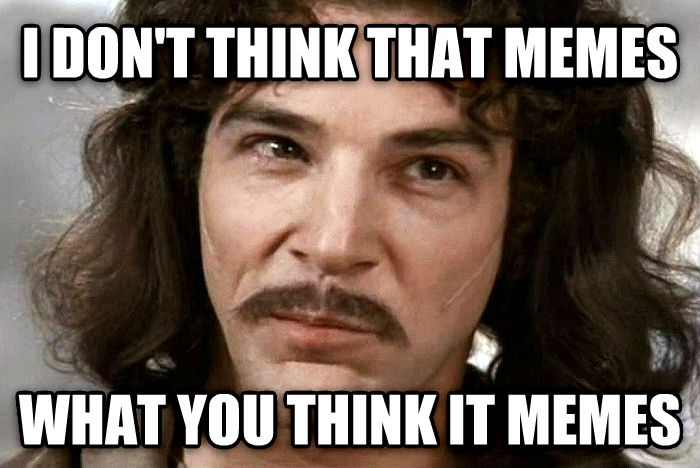
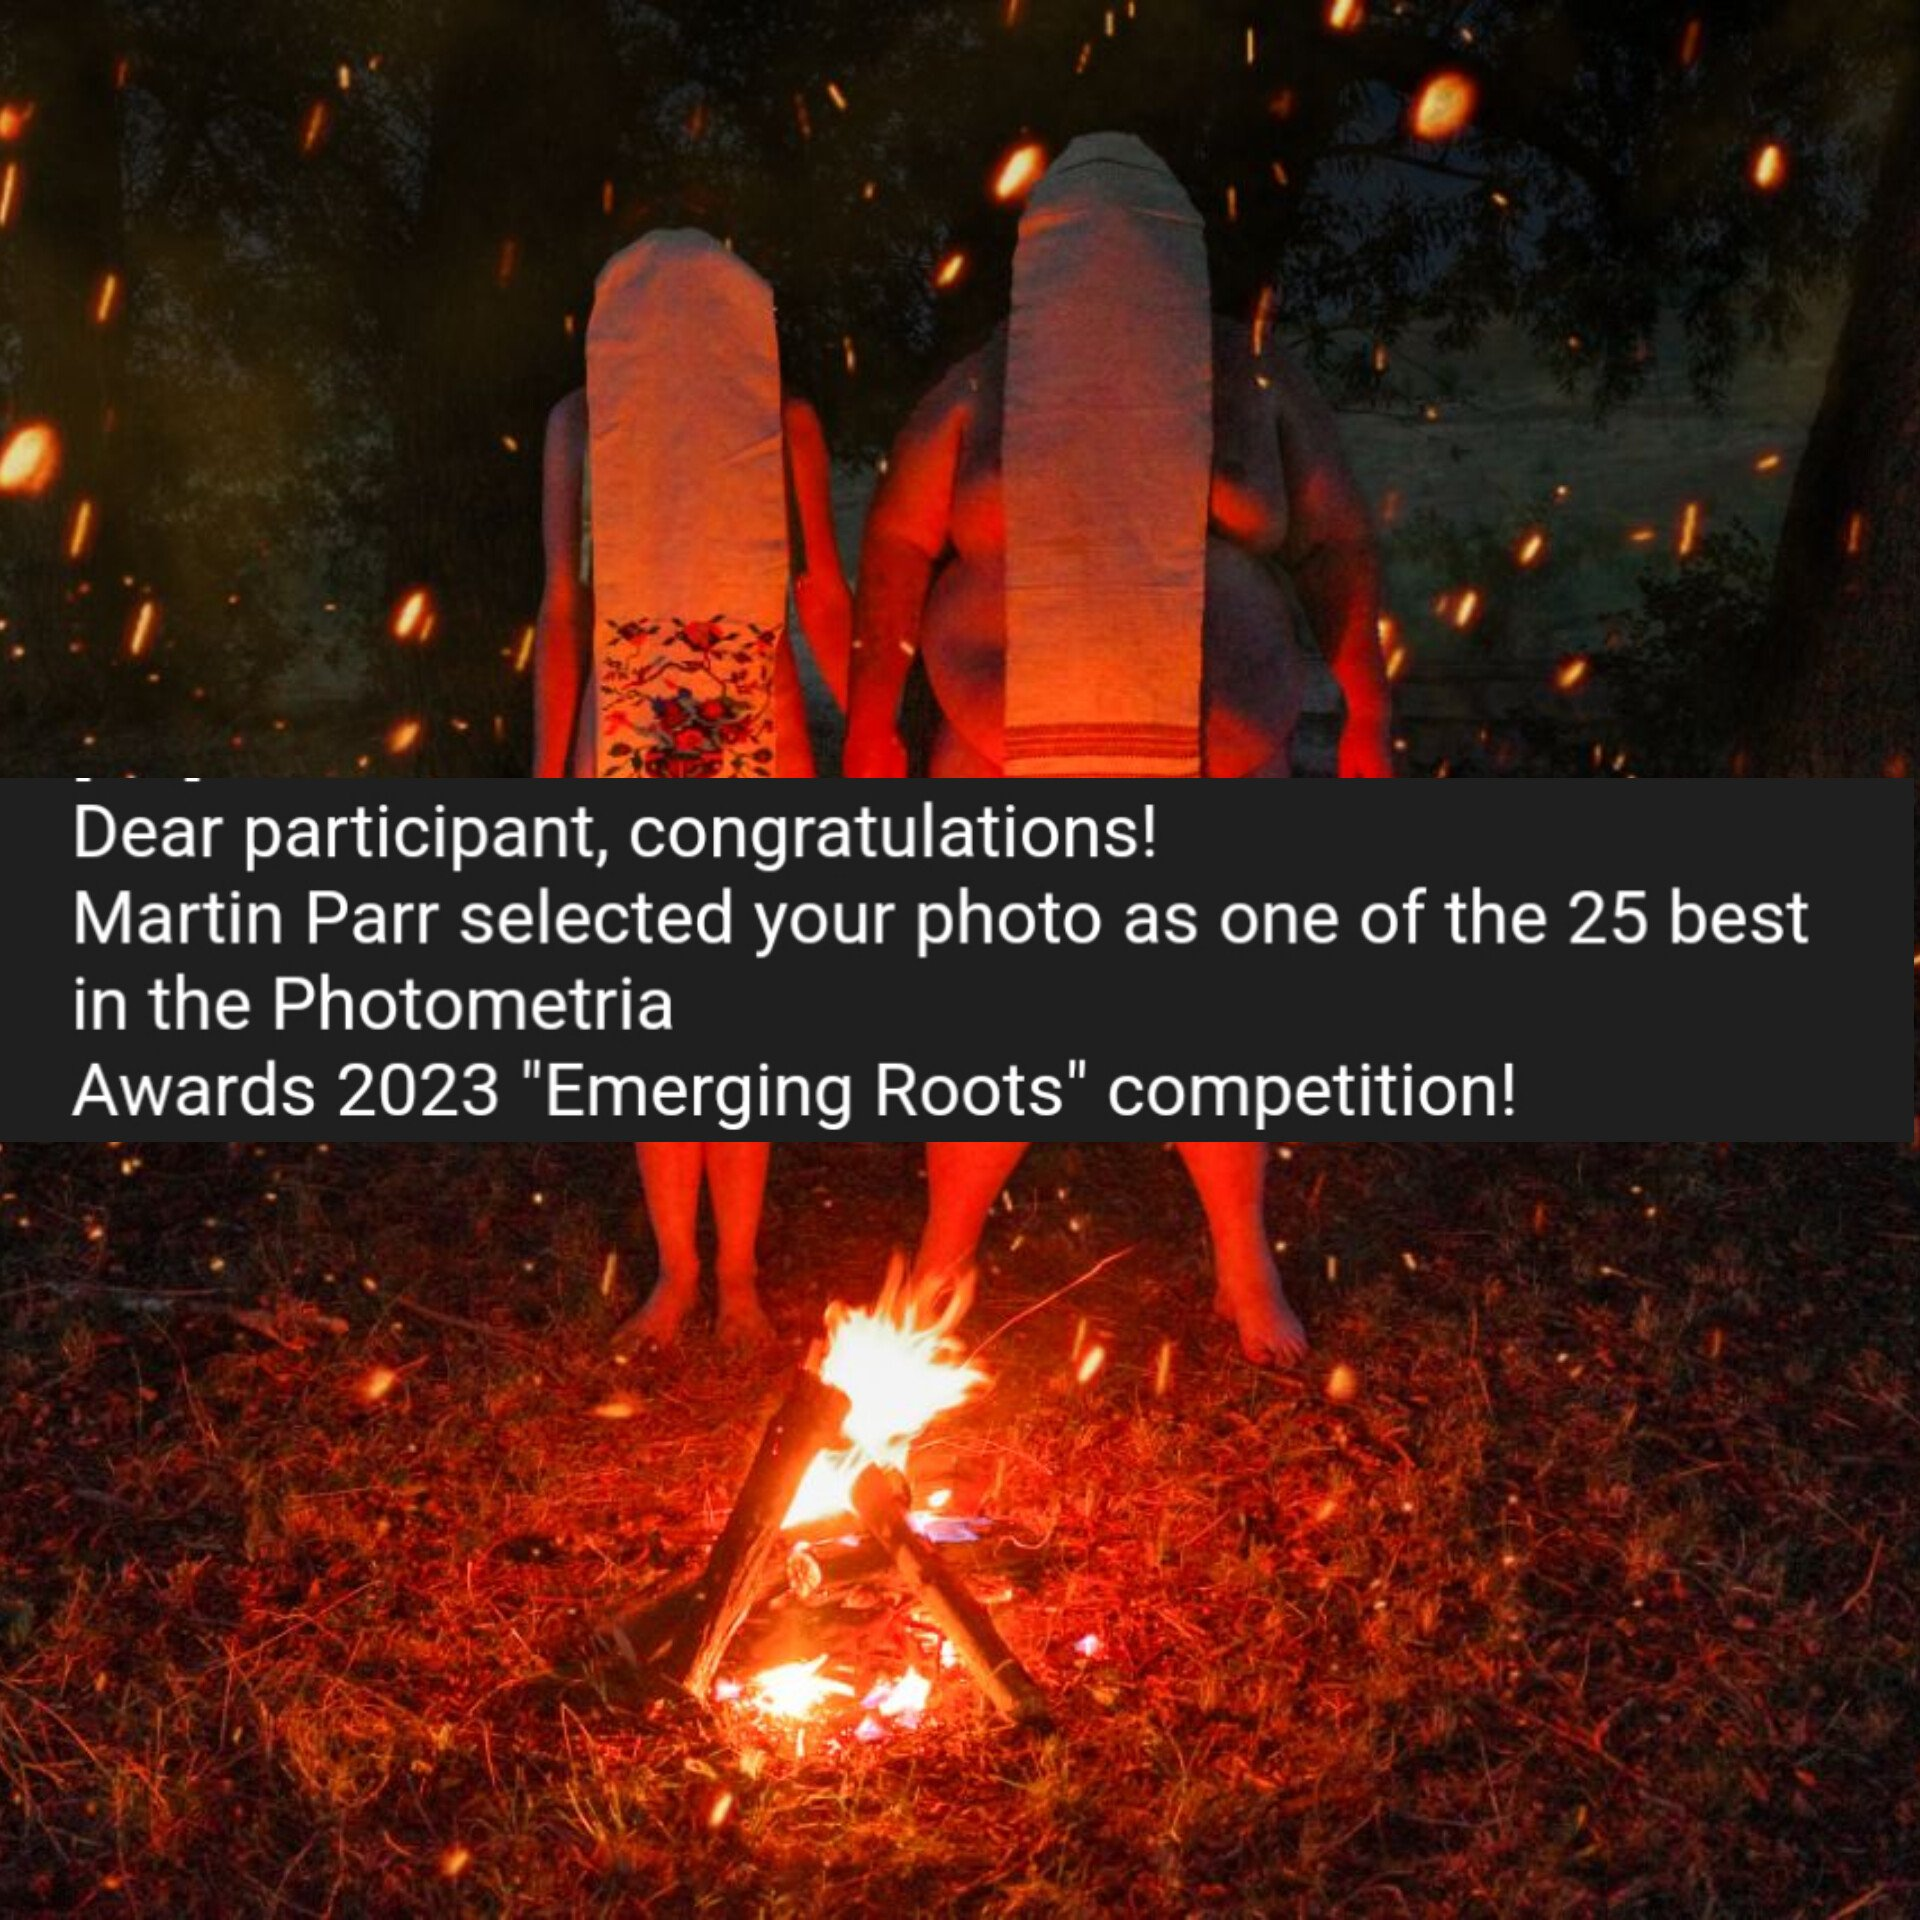
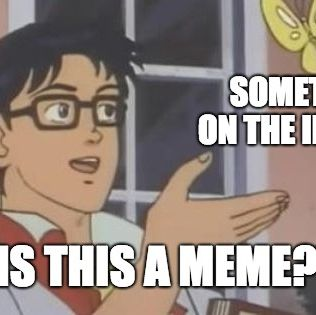

In [35]:
#@title Generate a table with results
def image_to_base64(filename):
    with open(filename, "rb") as image_file:
        encoded_string = base64.b64encode(image_file.read())
        return encoded_string.decode("utf-8")

def path_to_image_html(path):
    b64 = image_to_base64(path)
    return f'<img src="data:image/jpeg;base64,{b64}" alt="Base64 Image" width="60">'

table = pd.DataFrame(entry, columns=["Label", "Prediction", "Correct", "Image"], index=filenames)
table_html = table.to_html(escape=False, formatters=dict(Image=path_to_image_html))
HTML(table_html)

In [36]:
#@title Calculate some metrics.
y_pred = table.Prediction.apply(lambda v: model.classes.index(v))
y_true = table.Label.apply(lambda v: model.classes.index(v))

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         4

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

